# Question 4:
Is there a relationship between install numbers and price?

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')

In [2]:
# Import and verify cleaned data
df = pd.read_csv("data/out.csv", )
df.head()

,App,Category,Reviews,Size,Installs,Price,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",0,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",0,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",0,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",0,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",0,Art & Design;Creativity,"June 20, 2018"


In [3]:
# Double check installs
df['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Free                 1
Name: Installs, dtype: int64

In [4]:
# Found one invalid value (Free), so removed it, then verified
df.drop(df.loc[df["Installs"] == "Free"].index, inplace=True)
df['Installs'].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [5]:
# Check types of the values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 8 columns):
App             9658 non-null object
Category        9658 non-null object
Reviews         9658 non-null object
Size            9658 non-null object
Installs        9658 non-null object
Price           9658 non-null object
Genres          9658 non-null object
Last Updated    9658 non-null object
dtypes: object(8)
memory usage: 679.1+ KB


In [6]:
# Convert Installs to Integers
df.Installs = df.Installs.map(lambda x: x.replace(",", ""))
df.Installs = df.Installs.map(lambda x: x.replace("+", ""))
df.Installs = df.Installs.map(lambda x: x.strip())
df['Installs'] = df['Installs'].astype(int)
df['Installs'].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

In [7]:
# Convert Prices to Floats
df.Price = df.Price.map(lambda x: x.replace("$", ""))
df.Price = df.Price.map(lambda x: x.strip())
df['Price'] = df['Price'].astype(float)
df['Price'].value_counts()

0.00     8902
0.99      145
2.99      124
1.99       73
4.99       70
         ... 
1.59        1
46.99       1
19.90       1
28.99       1
1.04        1
Name: Price, Length: 92, dtype: int64

In [8]:
# Create a new DataFrame of Installs and Price, then verify
df_grouped = df.groupby('Price').sum().sort_values(by = 'Installs', ascending = False)
df_grouped.head()

,Installs
Price,
0.00,7.506557e+10
0.99,1.938737e+07
6.99,1.113310e+07
2.99,1.019002e+07
1.99,4.001131e+06


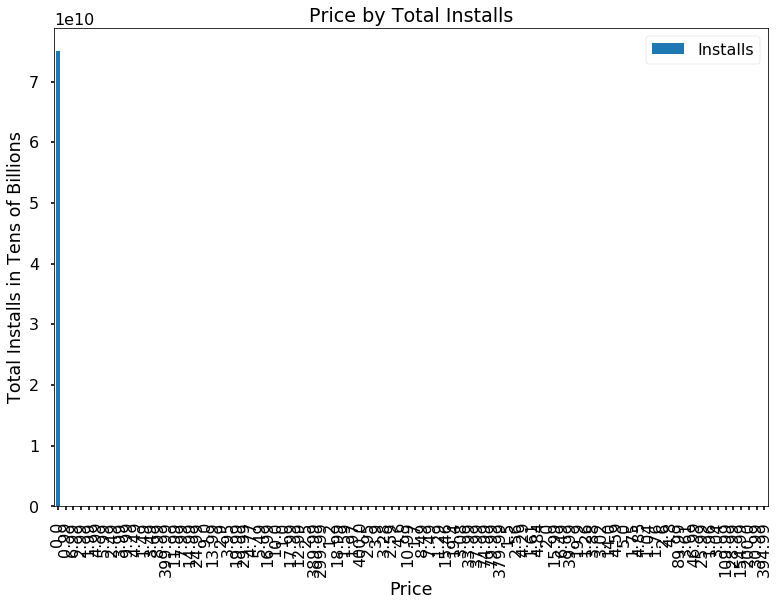

In [12]:
# Make a graph to visualize the data
df_grouped.plot(kind = 'bar');

plt.title('Price by Total Installs')
plt.ylabel('Total Installs in Tens of Billions');

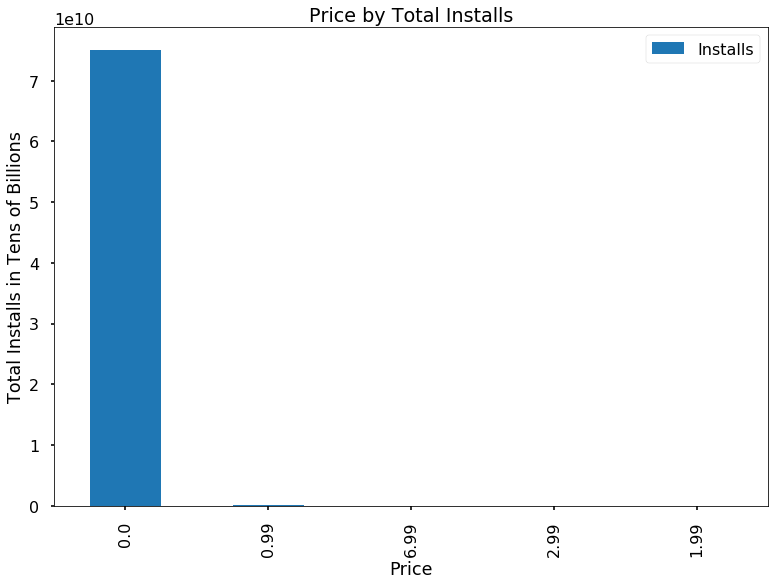

In [13]:
# The above graph looks a bit messy, so make another with fewer prices
df_grouped.head(5).plot(kind = 'bar');

plt.title('Price by Total Installs')
plt.ylabel('Total Installs in Tens of Billions');

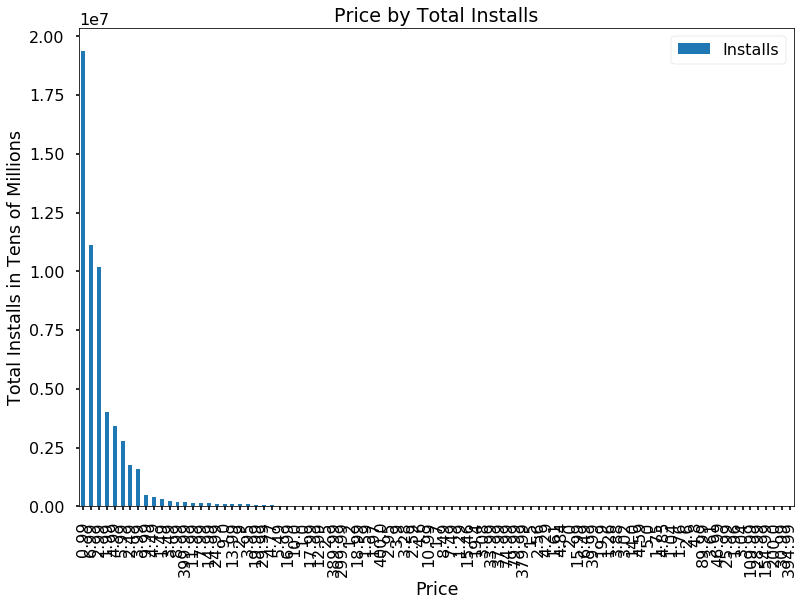

In [14]:
# Check the visualization without the free apps
df_grouped.iloc[1:92].plot(kind = 'bar');

plt.title('Price by Total Installs')
plt.ylabel('Total Installs in Tens of Millions');

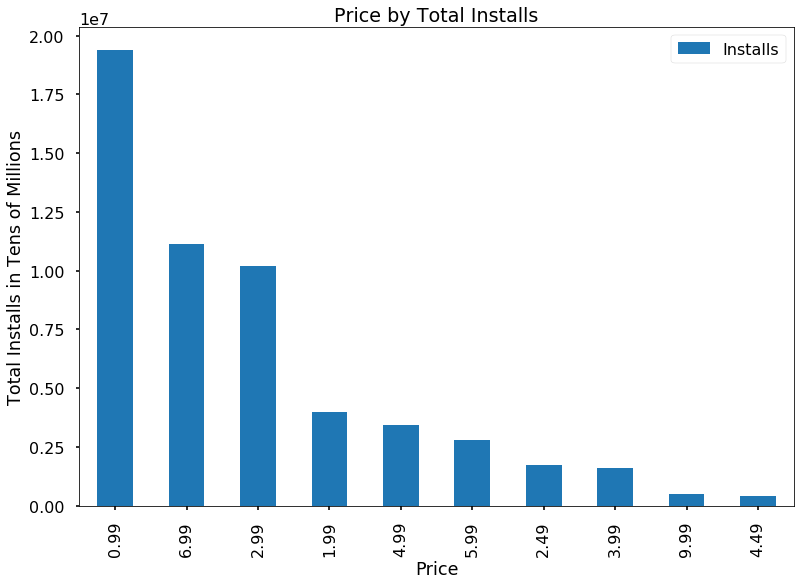

In [15]:
# Check again but dialed in a bit
df_grouped.iloc[1:11].plot(kind = 'bar');

plt.title('Price by Total Installs')
plt.ylabel('Total Installs in Tens of Millions');

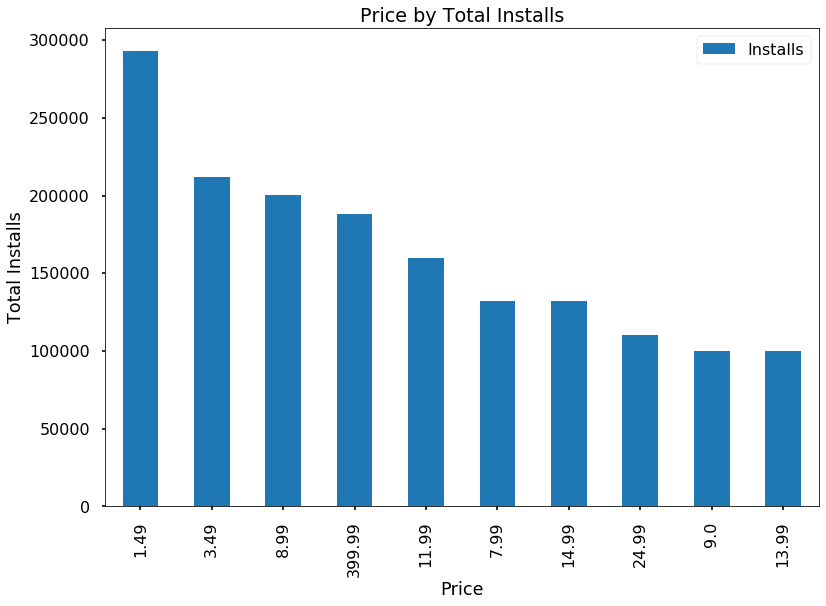

In [16]:
# One last time
df_grouped.iloc[11:21].plot(kind = 'bar');

plt.title('Price by Total Installs')
plt.ylabel('Total Installs');

In [18]:
# Finally, get the statistics for both Price and Installs by
# resetting the index to allow .describe to access Price
extra_df = df_grouped.reset_index()
extra_df.describe()

,Price,Installs
count,92.000000,9.200000e+01
mean,40.386087,8.165537e+08
std,95.153303,7.826062e+09
min,0.000000,0.000000e+00
25%,2.825000,1.000000e+02
50%,5.245000,2.000000e+03
75%,19.525000,6.401500e+04
max,400.000000,7.506557e+10
